In [1]:
from __future__ import division
%matplotlib inline


# ignore warning
import warnings
warnings.filterwarnings('ignore')

import os,time,cv2,scipy.io
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import matplotlib.pyplot as plt
from networks import build_aggasatt_joint
import scipy.stats as st

vgg19_path = './Models/imagenet-vgg-verydeep-19.mat'
pretrain_model_path = './Models/srdplus-pretrained/'

with tf.variable_scope(tf.get_variable_scope()):
    input=tf.placeholder(tf.float32,shape=[None,None,None,3])
    shadow_free_image=build_aggasatt_joint(input,64,vgg19_path)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
idtd_ckpt=tf.train.get_checkpoint_state(pretrain_model_path)
saver_restore=tf.train.Saver([var for var in tf.trainable_variables()])
print('loaded '+idtd_ckpt.model_checkpoint_path)
saver_restore.restore(sess,idtd_ckpt.model_checkpoint_path)


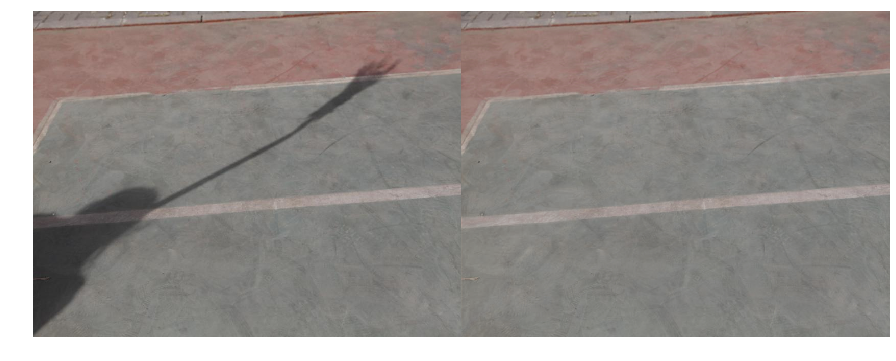

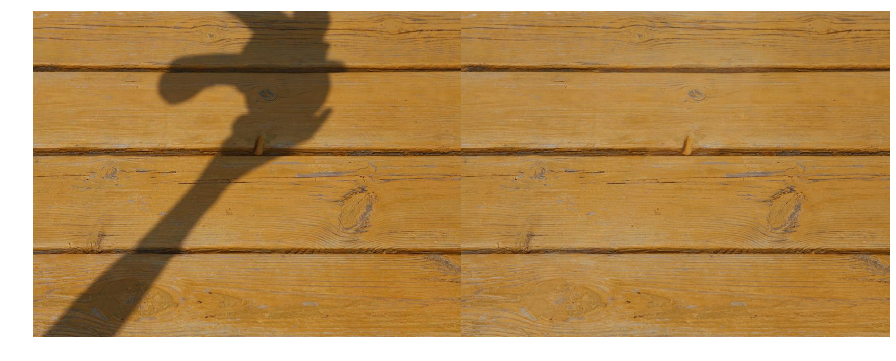

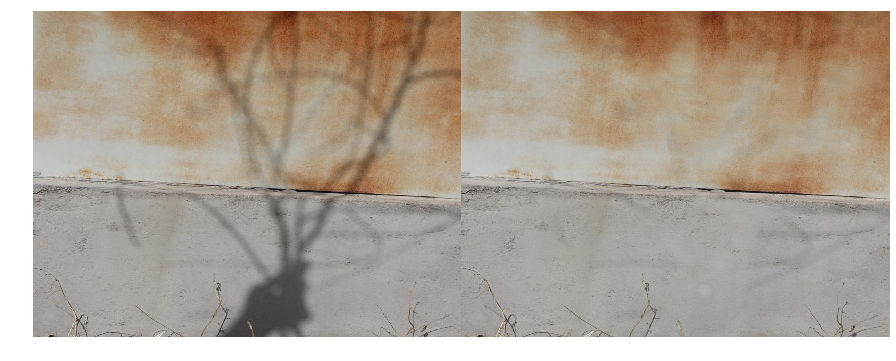

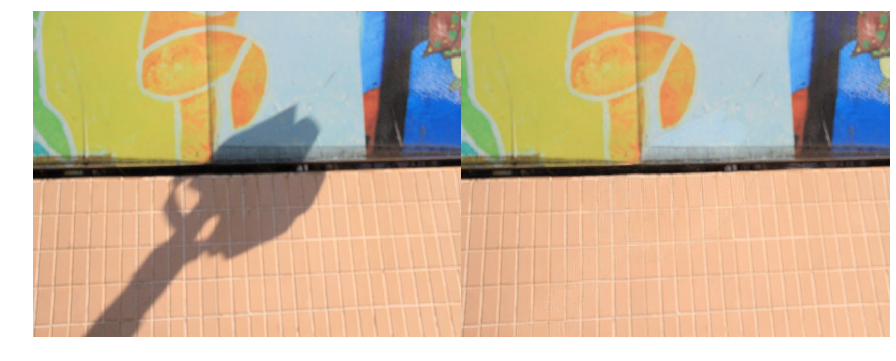

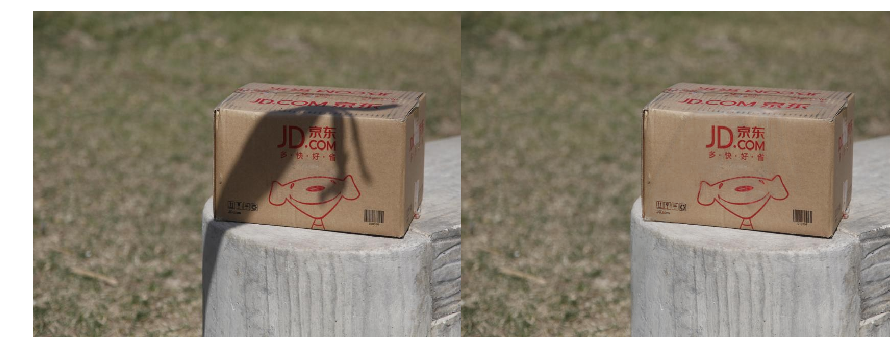

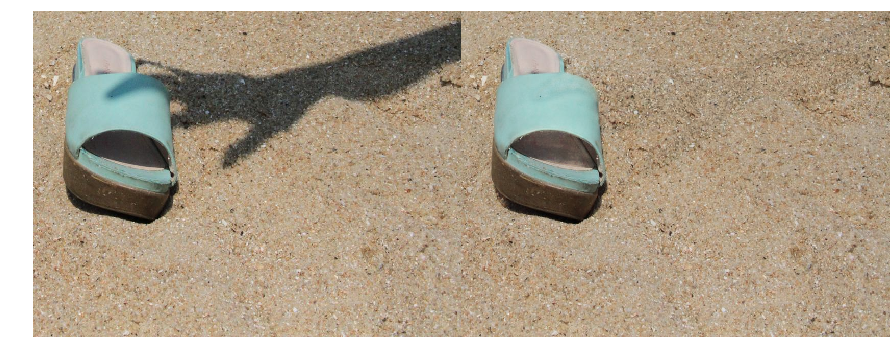

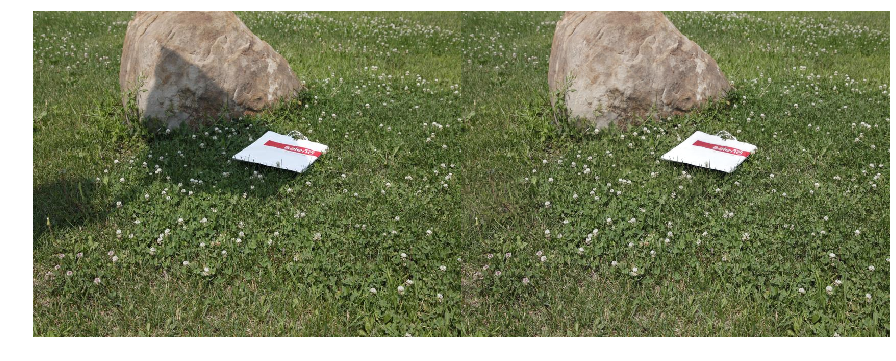

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,6)

imgs = [os.path.join('Samples',x) for x in os.listdir('Samples') if '.jpg' in x or '.png' in x]

for img_path in imgs:

    plt.figure()
    plt.axis('off')
    
    iminput=cv2.imread(img_path,-1)

    imoutput = sess.run(shadow_free_image,feed_dict={input:np.expand_dims(iminput/255.,axis=0)})

    imoutput = np.uint8(np.squeeze(np.minimum(np.maximum(imoutput[0],0.0),1.0))*255.0)

    imcompare = np.concatenate([iminput,imoutput],axis=1)

    # bgr->rgb
    plt.imshow(imcompare[...,::-1])
    plt.show()

